Importing libraries for data manipulation and visualization.

In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Reading the csv file into a dataframe. Then each column of the dataframe is tranformed into a series for accessibilty.

In [6]:

db = pd.read_csv('DataBreaches(2004-2021).csv')
db.drop(db.loc[db['Organization type']=='personal and demographic data about residents and their properties of US'].index, inplace=True)
db.drop(db.loc[db['Method']=='intentionally lost'].index, inplace=True)
db.drop(db.loc[db['Method']=='misconfiguration/poor security'].index, inplace=True)
#db=db.loc[(db['Method']=='poor security/inside job') & (db['Entity']=='Marriott International'),'Method'] =='social engineering'
#db =db.replace((db['Method'] == 'poor security/inside job') & (db['Entity'] == 'Marriott International'),['Method']=='social engineering')

company=db['Entity']
year=db['Year']
records=db['Records']
organization_type=db['Organization type']
method = db['Method']


The series_replace function replaces a number of strings with a given a string. The series_query function prints the companies' names when the method or organization type is found within the dataset.

In [7]:

def series_replace(db_data,cate,string):
    '''A function that replaces a number of strings with a given a string'''
    data_mod=db_data.replace(cate,string).str.lower()
    data_mod.sort_values(inplace = True)
    return data_mod

def series_query(series,db_data,string):
    '''A function that prints the companies' names when the method or organization type is found within the dataset'''
    for var, company in zip(series,db_data):
        if var == string:
            print(company)
    return
    

In [ ]:

clean_year=year.replace('2018-2019',2019)
clean_year=clean_year.replace('2014 and 2015',2015).astype(int)
#for year, company in zip(clean_year,db['Entity']):
#    if year == 2010:
#        print(company)




series_query(organization_type,db['Entity'],'web, gaming')
series_query(method,db['Entity'],'inside job, hacked')

#for type,company in zip(organization_type,db['Entity']):
#    if type == 'web, gaming':
#        print(company)

#for method,company in zip(method,db['Entity']):
#    if method=='rogue contractor':
#        print(company)

#for record, company in zip(records,db['Entity']):
#    if record <= 100000:
#        print(company)



This is a plot that shows the number of occurrences per the method of breach. 

Text(0.5, 1.0, 'Number of Occurrences vs Method of Breach')

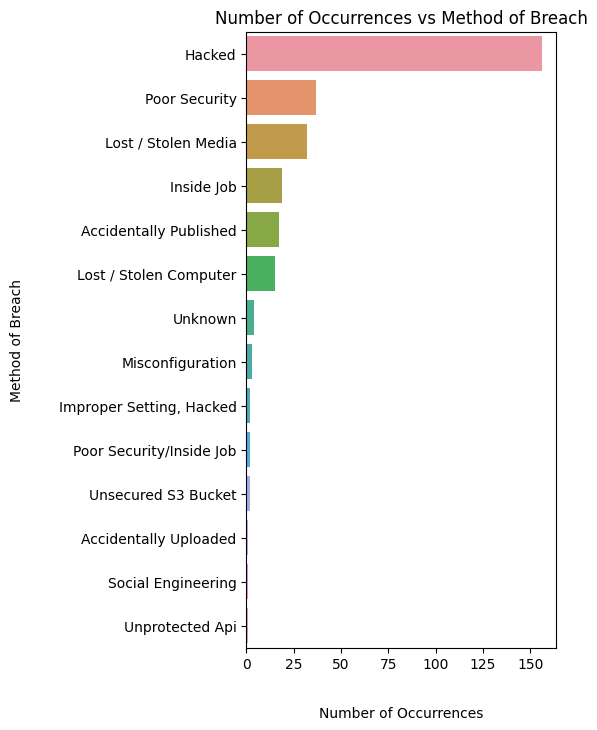

In [8]:

method=series_replace(db['Method'],['publicly accessible Amazon Web Services (AWS) server'],'unsecured S3 bucket')
method=series_replace(method,['accidentally exposed','data exposed by misconfiguration','rogue contractor'],'misconfiguration')
method=series_replace(method,['poor security / hacked'],'poor security')
method=series_replace(method,['inside job, hacked'],'inside job')


#(db['Method'],['accidentally exposed','data exposed by misconfiguration'],'misconfiguration')
#method.series_replace(db['Method'],['lost / stolen media',''],"lost")
method = pd.Series([i.title()for i in method])

plt.figure(figsize=(4,8))
sns.countplot(y=method.values,order=method.value_counts().index)
plt.ylabel('Method of Breach',labelpad=25)
plt.xlabel('Number of Occurrences',labelpad=25)
plt.title('Number of Occurrences vs Method of Breach')


This is a plot that shows the number of occurrences per type of organization.

Text(0.5, 1.0, 'Number of Occurrences vs Type of Organization')

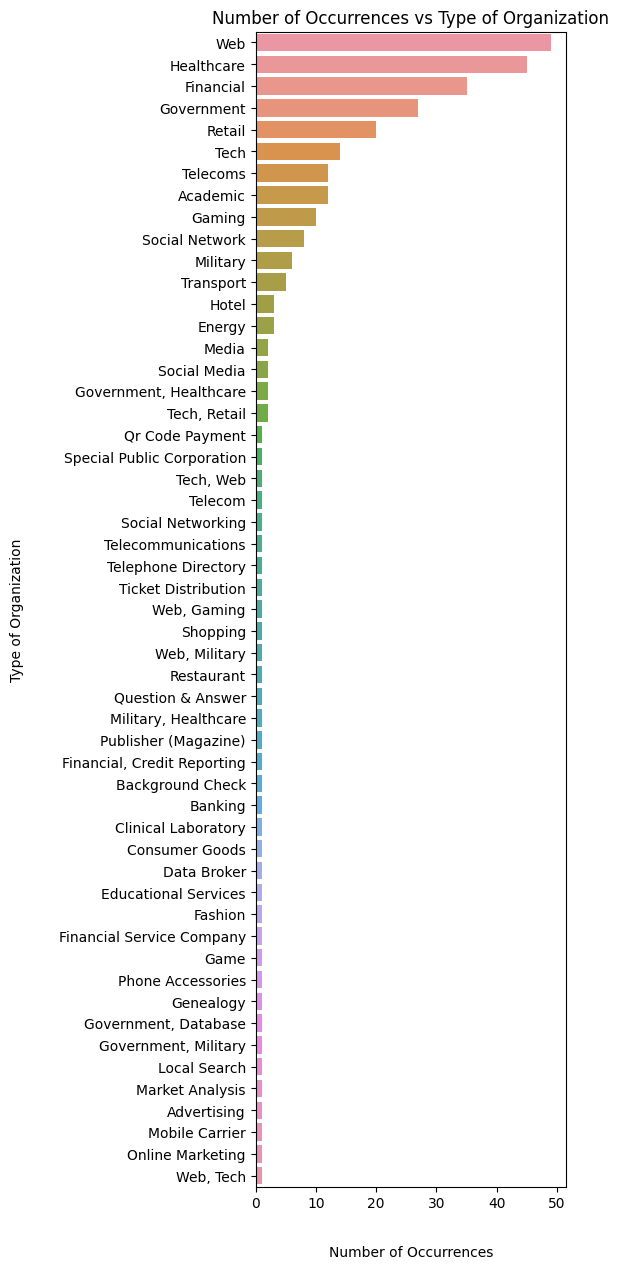

In [9]:

db_case=db['Organization type'].str.lower().sort_values()
db_case=pd.Series([i.title()for i in db_case])

plt.figure(figsize=(4,15))
#plt.xticks(rotation =90)
sns.countplot(y = db_case.values,order=db_case.value_counts().index)
plt.ylabel('Type of Organization',labelpad=25)
plt.xlabel('Number of Occurrences',labelpad=25)
plt.title('Number of Occurrences vs Type of Organization')
